In [1]:
!pip install --upgrade google-api-python-client google-auth-httplib2 google-auth-oauthlib

     --------------------------------------- 11.5/11.5 MB 27.3 MB/s eta 0:00:00
  Attempting uninstall: google-api-python-client
    Found existing installation: google-api-python-client 2.93.0
    Uninstalling google-api-python-client-2.93.0:
      Successfully uninstalled google-api-python-client-2.93.0


In [2]:
#!pip install tweepy
!pip install -U textblob
!pip install emoji --upgrade
!pip install wordcloud
!pip install nest_asyncio
!pip install --upgrade google-api-python-client

In [3]:
# Scrape Or Download Comments Using Python Through The Youtube Data API
# Watch the youtube video for explaination
# https://youtu.be/B9uCX2s7y7A

api_key = "" # Replace this dummy api key with your own.

from googleapiclient.discovery import build
youtube = build('youtube', 'v3', developerKey=api_key)

import pandas as pd

#ID = "UXO6YkDNMOA" # Replace this YouTube video ID with your own.
ID = "ewcWN-rHQ6Q" # Replace this YouTube video ID with your own.

box = [['Name', 'Comment', 'Time', 'Likes', 'Reply Count']]


def scrape_comments_with_replies():
    data = youtube.commentThreads().list(part='snippet', videoId=ID, maxResults='100', textFormat="plainText").execute()

    for i in data["items"]:

        name = i["snippet"]['topLevelComment']["snippet"]["authorDisplayName"]
        comment = i["snippet"]['topLevelComment']["snippet"]["textDisplay"]
        published_at = i["snippet"]['topLevelComment']["snippet"]['publishedAt']
        likes = i["snippet"]['topLevelComment']["snippet"]['likeCount']
        replies = i["snippet"]['totalReplyCount']

        box.append([name, comment, published_at, likes, replies])

        totalReplyCount = i["snippet"]['totalReplyCount']

        if totalReplyCount > 0:

            parent = i["snippet"]['topLevelComment']["id"]

            data2 = youtube.comments().list(part='snippet', maxResults='100', parentId=parent,
                                            textFormat="plainText").execute()

            for i in data2["items"]:
                name = i["snippet"]["authorDisplayName"]
                comment = i["snippet"]["textDisplay"]
                published_at = i["snippet"]['publishedAt']
                likes = i["snippet"]['likeCount']
                replies = ""

                box.append([name, comment, published_at, likes, replies])

    while ("nextPageToken" in data):

        data = youtube.commentThreads().list(part='snippet', videoId=ID, pageToken=data["nextPageToken"],
                                             maxResults='100', textFormat="plainText").execute()

        for i in data["items"]:
            name = i["snippet"]['topLevelComment']["snippet"]["authorDisplayName"]
            comment = i["snippet"]['topLevelComment']["snippet"]["textDisplay"]
            published_at = i["snippet"]['topLevelComment']["snippet"]['publishedAt']
            likes = i["snippet"]['topLevelComment']["snippet"]['likeCount']
            replies = i["snippet"]['totalReplyCount']

            box.append([name, comment, published_at, likes, replies])

            totalReplyCount = i["snippet"]['totalReplyCount']

            if totalReplyCount > 0:

                parent = i["snippet"]['topLevelComment']["id"]

                data2 = youtube.comments().list(part='snippet', maxResults='100', parentId=parent,
                                                textFormat="plainText").execute()

                for i in data2["items"]:
                    name = i["snippet"]["authorDisplayName"]
                    comment = i["snippet"]["textDisplay"]
                    published_at = i["snippet"]['publishedAt']
                    likes = i["snippet"]['likeCount']
                    replies = ''

                    box.append([name, comment, published_at, likes, replies])

    df = pd.DataFrame({'Name': [i[0] for i in box], 'Comment': [i[1] for i in box], 'Time': [i[2] for i in box],
                       'Likes': [i[3] for i in box], 'Reply Count': [i[4] for i in box]})

    df.to_csv('youtube-comments.csv', index=False, header=False)

    return "Successful! Check the CSV file that you have just created."

In [4]:
scrape_comments_with_replies()

'Successful! Check the CSV file that you have just created.'

In [5]:
import pandas as pd
pd.options.display.max_rows = 10

df = pd.read_csv('youtube-comments.csv', index_col=0)
df

,Comment,Time,Likes,Reply Count
Name,,,,
KYLE.ENGINEERS,"It was great working on this video together, I...",2017-07-31T22:24:41Z,777,24.0
Mark Mapanao,Biofuel is cleaner,2021-04-14T10:46:46Z,0,NaN
deerhunter 1989,GASOLINE ENGINES WILL ALWAYS BE BETTER... PROV...,2021-01-30T02:58:18Z,1,NaN
voice5sur5,"i wish you reduce the ""background"" music which...",2021-01-01T09:53:34Z,0,NaN
許進曾,People need to lean about energy conversion. J...,2020-10-09T21:00:07Z,0,NaN
...,...,...,...,...
Ray O’Grady,Anti-Cryptic 90 the cars themselves do not pol...,2017-07-31T15:43:10Z,62,NaN
M.D. Gupta,tesla tesla...... I love that car,2017-07-31T15:37:10Z,0,0.0
M.D. Gupta,yeh,2017-07-31T15:36:21Z,0,0.0


In [6]:
df.columns

Index(['Comment', 'Time', 'Likes', 'Reply Count'], dtype='object')

In [38]:
df['Comment'].nunique()

3398

In [8]:
# load library
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# download the set of stop words the first time
import nltk
nltk.download('stopwords')
nltk.download('words')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nisha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\nisha\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [9]:
# Load stop words
stop_words = stopwords.words('english')

# Show stop words
stop_words[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [10]:
#### Now creating some functions to do text processing
# Removing hashtags and mentions
def get_hashtags(text):
    hashtags = re.findall(r'\#\w+',text.lower())
    return hashtags
def get_mentions(text):
    mentions = re.findall(r'\@\w+',text.lower())
    return mentions

# Cleaning up the text of the tweets
def remove_content(text):
    text = re.sub(r"http\S+", "", text) #remove urls
    text=re.sub(r'\S+\.com\S+','',text) #remove urls
    text=re.sub(r'\@\w+','',text) #remove mentions
    text =re.sub(r'\#\w+','',text) #remove hashtags
    return text

def process_tweet(tweet):
    """ 
    tweets cleaning by 
    1) lowering the case of the tweet, 
    2) removing unwanted symbols and replacing them with a whitespace, 
    3) split sentences into words according to whitespaces and then 
    4) join back with a single whitespace as separator between various words
    """
    return " ".join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])", " ",tweet.lower()).split())

def process_text(text, stem=False): #clean text
    text=remove_content(text)
    lemmatizer=WordNetLemmatizer()
    text = re.sub('[^A-Za-z]', ' ', text.lower()) #remove non-alphabets
    text = re.sub(r'@[A-Za-z0-9]+', '', str(text)) # remove @mentions
    text = re.sub(r'#', '',  str(text)) # remove the '#' symbol
    text = re.sub(r'RT[\s]+', '',  str(text)) # remove RT
    text = re.sub(r'https?\/\/S+', '',  str(text)) # remove the hyperlink
    text = re.sub(r'http\S+', '',  str(text)) # remove the hyperlink
    text = re.sub(r'www\S+', '',  str(text)) # remove the www
    text = re.sub(r'pic+', '',  str(text)) # remove the pic
    text = re.sub(r'com', '',  str(text)) # remove the pic
    text = re.sub(r"\bamp\b", ' ', text.lower()) #remove "amp" which is coming from the translation of &
    text = re.sub(r"\bco\b", ' ', text.lower()) #remove "co" which was one of the top words found below
    tokenized_text = word_tokenize(text) #tokenize
    #tokenized_text = [lemmatizer.lemmatize(word) for word in tokenized_text]
    clean_text = [
         word for word in tokenized_text
         if (word not in stop_words and len(word)>1)
    ]
    if stem:
        clean_text=[stemmer.stem(word) for word in clean_text]
    clean_text = [lemmatizer.lemmatize(word) for word in clean_text]
    return ' '.join(clean_text)

#functions used to remove search terms from all the tweets
#function to remove duplicates from a string - in this case the string is the keywords used to scrape the tweets
def removeDupWithoutOrder(string): 
    words = string.lower().split()
    return " ".join(sorted(set(words), key=words.index)).replace('OR', '').replace('  ', ' ')

#function to search for string i.e. remove specific words (search_terms in this case)
def remove_search(text, search_terms):
    query = text.lower()
    querywords = query.split()
    resultwords  = [word for word in querywords if word.lower() not in search_terms]
    return ' '.join(resultwords)

# define function to plot frequency of bi-grams, tri-grams, single words, phrases etc
from sklearn.feature_extraction.text import CountVectorizer
def plot_topn(sentences, ngram_range=(1,3), top=20,firstword=''):
    c=CountVectorizer(ngram_range=ngram_range)
    X=c.fit_transform(sentences)
    words=pd.DataFrame(X.sum(axis=0),columns=c.get_feature_names()).T.sort_values(0,ascending=False).reset_index()
    res=words[words['index'].apply(lambda x: firstword in x)].head(top)
    pl=px.bar(res, x='index',y=0)
    pl.update_layout(yaxis_title='count',xaxis_title='Phrases')
    pl.show('png')

In [11]:
import re
re.compile('<title>(.*)</title>')

re.compile(r'<title>(.*)</title>', re.UNICODE)

In [12]:
# removing useless content (hashtags, mentions)
df['Comment']=df['Comment'].apply(lambda x: remove_content(x))

In [13]:
# Several functions applied here: processing the comments to remove punctuation, hashtags, mentions 

df['cleaned_comments']=df['Comment'].apply(lambda x: process_tweet(x))

In [14]:
df

,Comment,Time,Likes,Reply Count,cleaned_comments
Name,,,,,
KYLE.ENGINEERS,"It was great working on this video together, I...",2017-07-31T22:24:41Z,777,24.0,it was great working on this video together i ...
Mark Mapanao,Biofuel is cleaner,2021-04-14T10:46:46Z,0,NaN,biofuel is cleaner
deerhunter 1989,GASOLINE ENGINES WILL ALWAYS BE BETTER... PROV...,2021-01-30T02:58:18Z,1,NaN,gasoline engines will always be better prove m...
voice5sur5,"i wish you reduce the ""background"" music which...",2021-01-01T09:53:34Z,0,NaN,i wish you reduce the background music which i...
許進曾,People need to lean about energy conversion. J...,2020-10-09T21:00:07Z,0,NaN,people need to lean about energy conversion ju...
...,...,...,...,...,...
Ray O’Grady,Anti-Cryptic 90 the cars themselves do not pol...,2017-07-31T15:43:10Z,62,NaN,anti cryptic 90 the cars themselves do not pol...
M.D. Gupta,tesla tesla...... I love that car,2017-07-31T15:37:10Z,0,0.0,tesla tesla i love that car
M.D. Gupta,yeh,2017-07-31T15:36:21Z,0,0.0,yeh


In [15]:
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [16]:
df.groupby(['cleaned_comments'])['cleaned_comments'].count()

cleaned_comments
                                                                                                                                                                                                                                                                                                                                                                                                                                                                               38
0 00 deja vu                                                                                                                                                                                                                                                                                                                                                                                                                                                                    1
0 00 the cars drift to get fuel                    

In [17]:
##comment_words.count("electric")
#df["cleaned_comments"].count("electric")

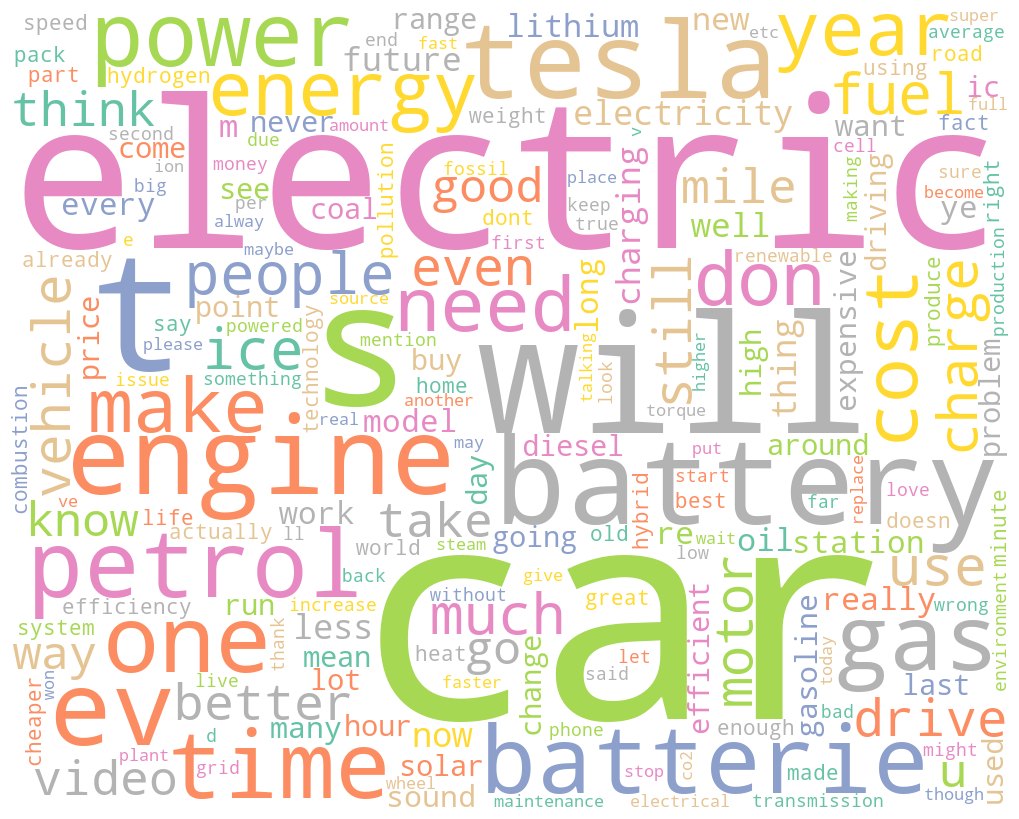

In [18]:
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df.cleaned_comments: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 1000, height = 800, 
                background_color='white', colormap='Set2', 
                collocations=False, 
                stopwords = stopwords, 
                min_font_size = 12).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [19]:
import pandas as pd
import numpy as np
import string
import re
import nltk
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [20]:
def getSubjectivity(text):
    return TextBlob( str(text)).sentiment.subjectivity

def getPolarity(text):
    return TextBlob( str(text)).sentiment.polarity

In [21]:
df.dropna(subset=['cleaned_comments'], inplace = True)
df.reset_index(drop=True, inplace=True)

In [22]:
df['Subjectivity'] = df['cleaned_comments'].apply(getSubjectivity)
df['Polarity'] = df['cleaned_comments'].apply(getPolarity)
df.head()

,Comment,Time,Likes,Reply Count,cleaned_comments,Subjectivity,Polarity
0,"It was great working on this video together, I...",2017-07-31T22:24:41Z,777,24.0,it was great working on this video together i ...,0.458333,0.433333
1,Biofuel is cleaner,2021-04-14T10:46:46Z,0,NaN,biofuel is cleaner,0.000000,0.000000
2,GASOLINE ENGINES WILL ALWAYS BE BETTER... PROV...,2021-01-30T02:58:18Z,1,NaN,gasoline engines will always be better prove m...,0.700000,0.000000
3,"i wish you reduce the ""background"" music which...",2021-01-01T09:53:34Z,0,NaN,i wish you reduce the background music which i...,0.600000,0.400000
4,People need to lean about energy conversion. J...,2020-10-09T21:00:07Z,0,NaN,people need to lean about energy conversion ju...,0.700000,0.366667


In [23]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def get_Polarity_Analysis(score):
    if score < 0:
      return 'Negative'
    elif score == 0:
      return 'Neutral'
    else:
      return 'Positive'
def get_Subjectivity_Analysis(score):
    if score >  0:
      return 'Opinion'
    else:
      return 'Fact'

df['Analysis_Polarity'] = df['Polarity'].apply(get_Polarity_Analysis)

df['Analysis_Subjectivity'] = df['Subjectivity'].apply(get_Subjectivity_Analysis)

In [24]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(font_scale=2)

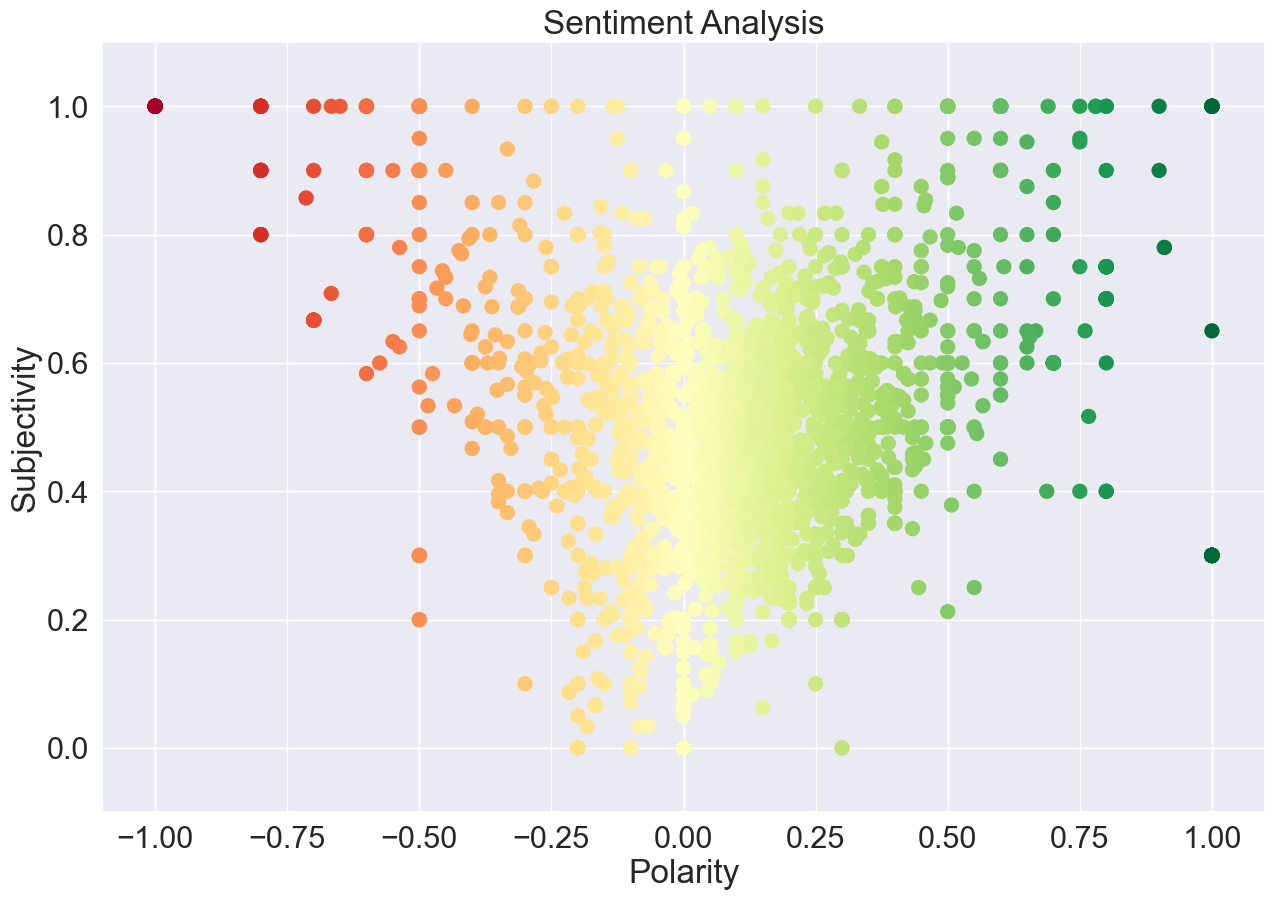

(None,)

In [25]:
plt.figure(figsize=(15,10)) 

# plt.style.use('seaborn-pastel')

plt.scatter(df['Polarity'], df['Subjectivity'], c=df['Polarity'], s=100, cmap='RdYlGn') 

plt.xlim(-1.1, 1.1)
plt.ylim(-0.1, 1.1) 
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show(),

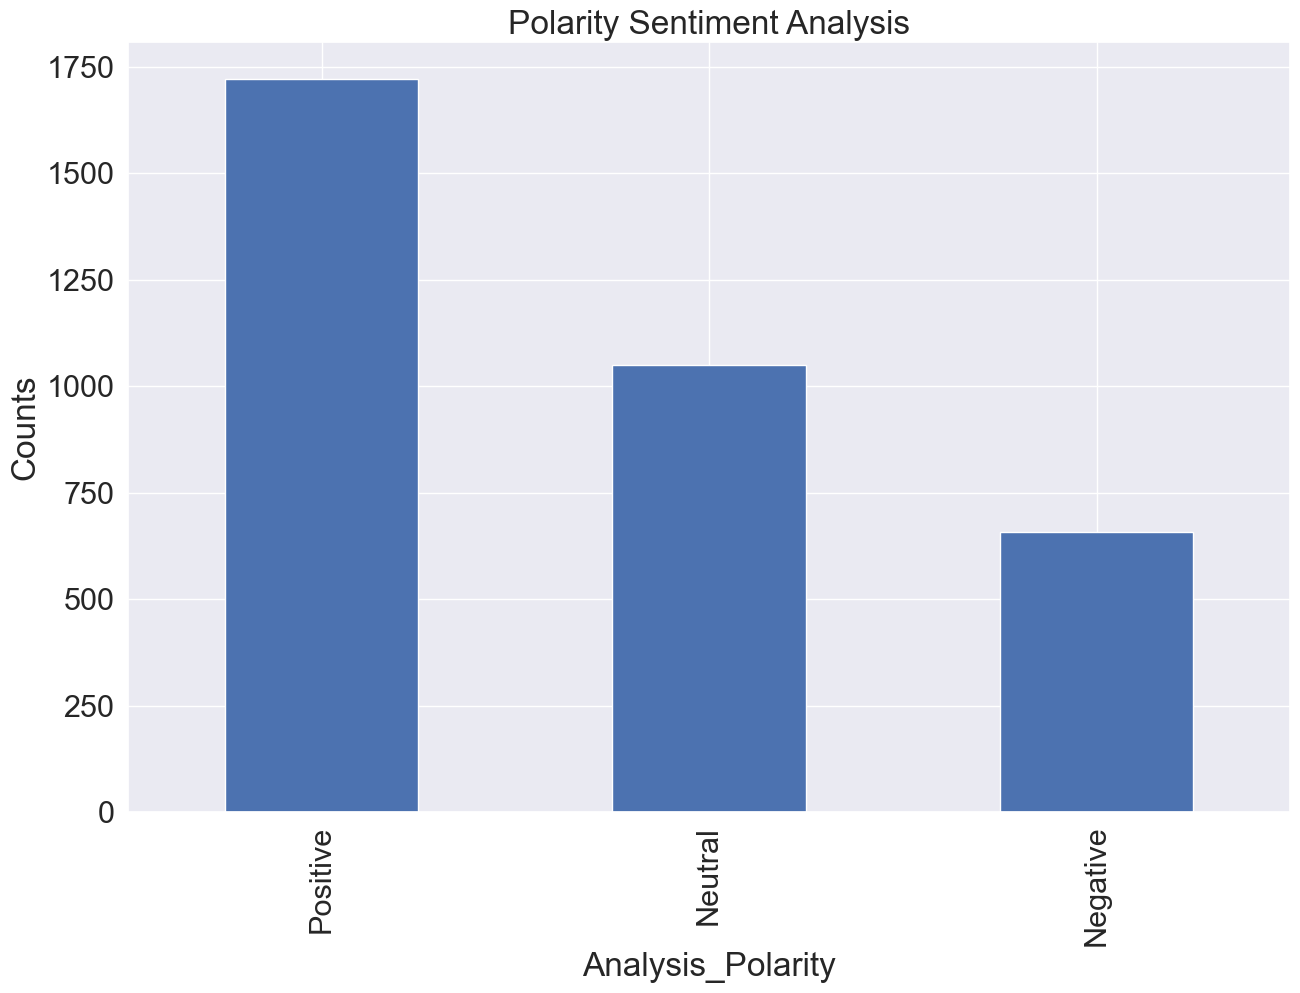

In [26]:
# Plotting and visualizing the counts
plt.figure(figsize=(15,10)) 

plt.title('Polarity Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis_Polarity'].value_counts().plot(kind = 'bar')
plt.show()

Plot saved as 'subjectivity_sentiment_plot.png'


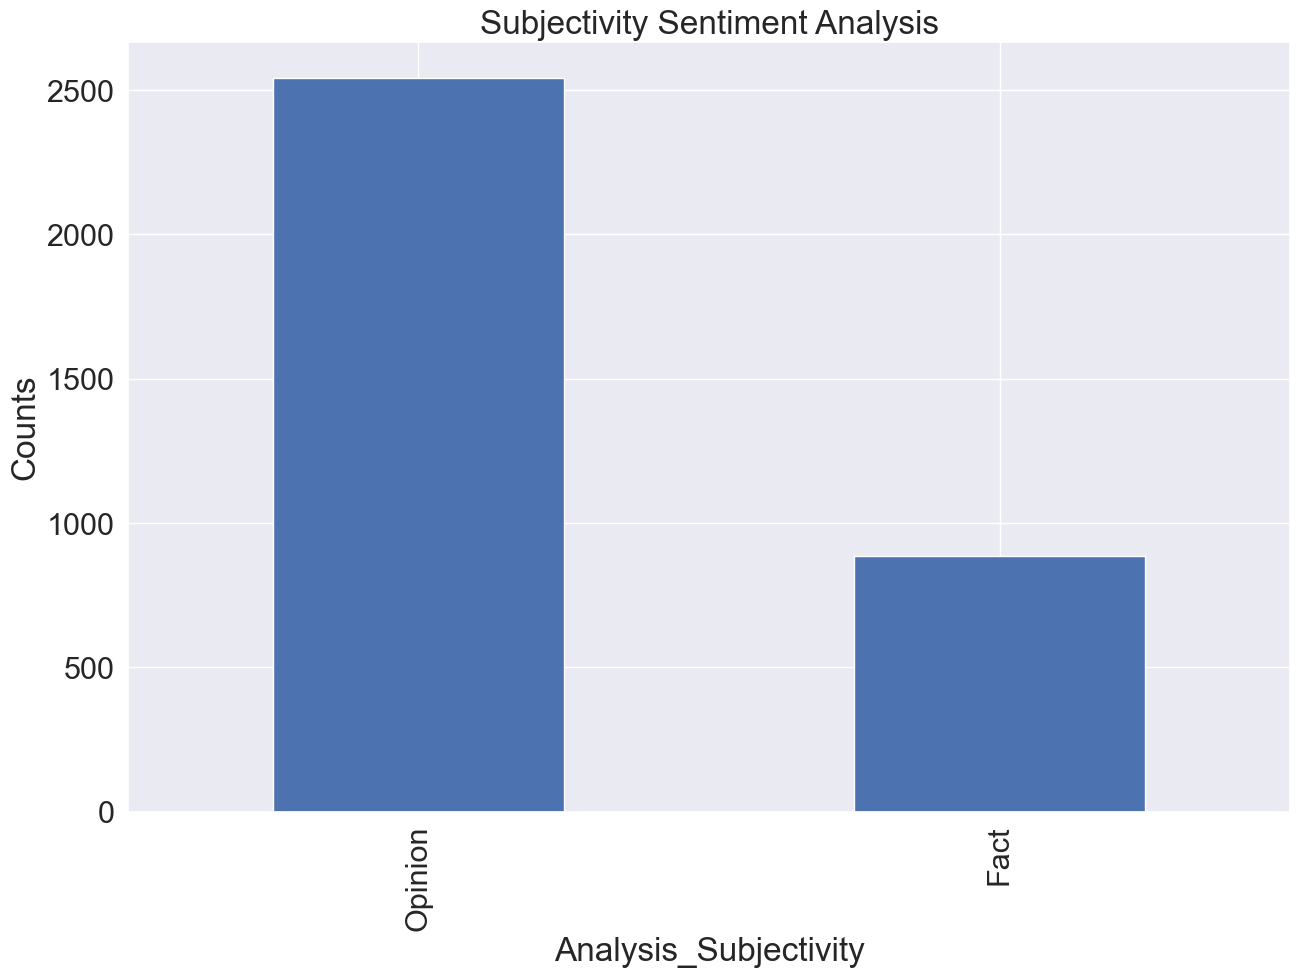

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plt.title('Subjectivity Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis_Subjectivity'].value_counts().plot(kind='bar')

# Save the plot as an image file
plt.savefig('subjectivity_sentiment_plot.png')

# Display a message indicating the successful save
print("Plot saved as 'subjectivity_sentiment_plot.png'")

plt.show()


In [28]:
df

,Comment,Time,Likes,Reply Count,cleaned_comments,Subjectivity,Polarity,Analysis_Polarity,Analysis_Subjectivity
0,"It was great working on this video together, I...",2017-07-31T22:24:41Z,777,24.0,it was great working on this video together i ...,0.458333,0.433333,Positive,Opinion
1,Biofuel is cleaner,2021-04-14T10:46:46Z,0,NaN,biofuel is cleaner,0.000000,0.000000,Neutral,Fact
2,GASOLINE ENGINES WILL ALWAYS BE BETTER... PROV...,2021-01-30T02:58:18Z,1,NaN,gasoline engines will always be better prove m...,0.700000,0.000000,Neutral,Opinion
3,"i wish you reduce the ""background"" music which...",2021-01-01T09:53:34Z,0,NaN,i wish you reduce the background music which i...,0.600000,0.400000,Positive,Opinion
4,People need to lean about energy conversion. J...,2020-10-09T21:00:07Z,0,NaN,people need to lean about energy conversion ju...,0.700000,0.366667,Positive,Opinion
...,...,...,...,...,...,...,...,...,...
3422,Anti-Cryptic 90 the cars themselves do not pol...,2017-07-31T15:43:10Z,62,NaN,anti cryptic 90 the cars themselves do not pol...,0.000000,0.000000,Neutral,Fact
3423,tesla tesla...... I love that car,2017-07-31T15:37:10Z,0,0.0,tesla tesla i love that car,0.600000,0.500000,Positive,Opinion
3424,yeh,2017-07-31T15:36:21Z,0,0.0,yeh,0.000000,0.000000,Neutral,Fact
3425,"nice,!",2017-07-31T15:35:22Z,0,0.0,nice,1.000000,0.600000,Positive,Opinion


In [29]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = df.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nisha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['great', 'working', 'video', 'together', 'look', 'forward', 'collaborations', 'future', 'great', 'working', 'video', 'together', 'look', 'forward', 'collaborations', 'future', 'positive', 'opinion']


In [30]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 2), (1, 2), (2, 2), (3, 2), (4, 2), (5, 1), (6, 1), (7, 2), (8, 2), (9, 2)]


In [31]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.026*"cars" + 0.020*"opinion" + 0.014*"car" + 0.012*"nan" + 0.012*"tesla" '
  '+ 0.010*"positive" + 0.008*"electric" + 0.008*"ev" + 0.008*"people" + '
  '0.007*"neutral"'),
 (1,
  '0.017*"battery" + 0.016*"cars" + 0.016*"nan" + 0.013*"neutral" + '
  '0.013*"fact" + 0.011*"opinion" + 0.009*"like" + 0.008*"car" + '
  '0.008*"electric" + 0.008*"positive"'),
 (2,
  '0.023*"electric" + 0.021*"car" + 0.016*"opinion" + 0.016*"cars" + '
  '0.014*"ev" + 0.012*"positive" + 0.010*"nan" + 0.009*"battery" + '
  '0.008*"would" + 0.006*"batteries"'),
 (3,
  '0.018*"cars" + 0.016*"electric" + 0.016*"car" + 0.014*"opinion" + '
  '0.010*"nan" + 0.008*"also" + 0.008*"positive" + 0.008*"like" + '
  '0.008*"engine" + 0.007*"need"'),
 (4,
  '0.018*"opinion" + 0.015*"car" + 0.013*"positive" + 0.013*"tesla" + '
  '0.012*"electric" + 0.012*"nan" + 0.008*"cars" + 0.007*"also" + '
  '0.007*"battery" + 0.007*"fact"'),
 (5,
  '0.022*"electric" + 0.019*"opinion" + 0.018*"car" + 0.017*"nan" + '
  '0.013*"ca

In [32]:
import shutil

# Path to the HTML file generated by pyLDAvis
ldavis_html_path = './results/ldavis_prepared_{}.html'.format(num_topics)

# Destination path to save the downloaded HTML file
download_path = './results/ldavis_prepared_{}_download.html'.format(num_topics)

# Copy the HTML file to the download path
shutil.copy2(ldavis_html_path, download_path)

print('LDAvis downloaded successfully.')


LDAvis downloaded successfully.


In [33]:
pip install pyLDAvis

Note: you may need to restart the kernel to use updated packages.


In [34]:
pip install joblib==<version>


Note: you may need to restart the kernel to use updated packages.


The syntax of the command is incorrect.


In [35]:
pip install joblib==1.0.1



  Using cached joblib-1.0.1-py3-none-any.whl (303 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.3.1
    Uninstalling joblib-1.3.1:
      Successfully uninstalled joblib-1.3.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-learn 1.3.0 requires joblib>=1.1.1, but you have joblib 1.0.1 which is incompatible.
pyldavis 3.4.1 requires joblib>=1.2.0, but you have joblib 1.0.1 which is incompatible.
imbalanced-learn 0.10.1 requires joblib>=1.1.1, but you have joblib 1.0.1 which is incompatible.


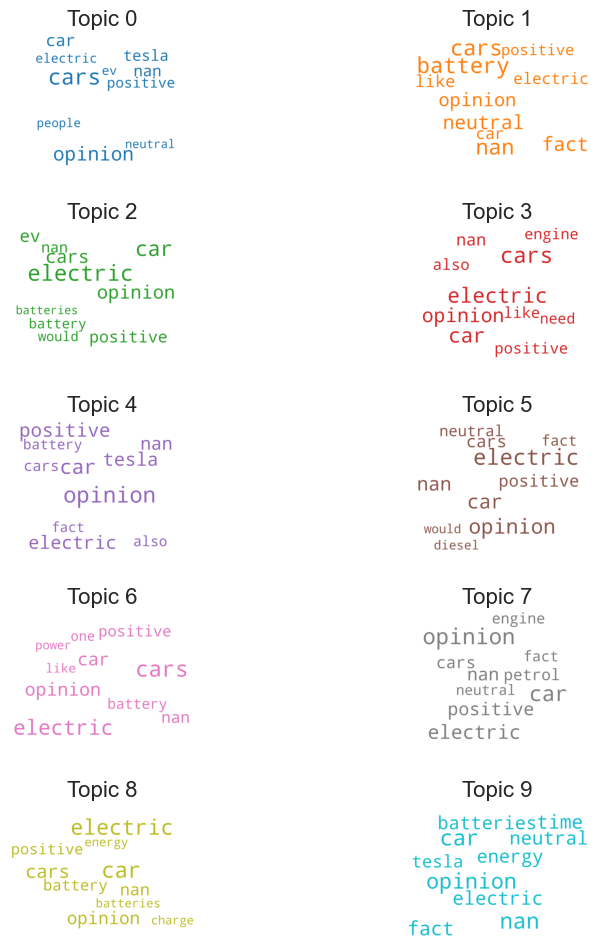

In [36]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots( int(num_topics/2), 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [37]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis
import os

# Create the 'results' directory if it doesn't exist
results_dir = './results'
os.makedirs(results_dir, exist_ok=True)


# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join(results_dir, 'ldavis_prepared_' + str(num_topics))

if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word, n_jobs=1)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.008777 -0.001897       1        1  21.550062
8     -0.006869 -0.005488       2        1  14.018073
4     -0.003255  0.020281       3        1  11.818978
2      0.001119  0.004053       4        1   8.757274
9     -0.001057  0.047989       5        1   8.281627
0      0.010264  0.009233       6        1   8.126183
7     -0.015791  0.013274       7        1   8.085735
5      0.000349 -0.058203       8        1   6.886564
3     -0.050169 -0.018997       9        1   6.805408
1      0.074185 -0.010245      10        1   5.670095, topic_info=         Term         Freq        Total Category  logprob  loglift
237      cars  2438.000000  2438.000000  Default  30.0000  30.0000
437     tesla   842.000000   842.000000  Default  29.0000  29.0000
14    neutral   974.000000   974.000000  Default  28.0000  28.0000
78   electric  2549.000000  2549.000000  Default  27.0000  27.0000
12       fact   970.000000   970.000000  Default  26.0000  26.0000
..        ...          ...          ...      ...      ...      ...
37     people    28.293869   597.362340  Topic10  -5.6690  -0.1799
262     drive    25.166393   422.710198  Topic10  -5.7861   0.0488
201    engine    26.471626   687.621204  Topic10  -5.7356  -0.3872
33     energy    25.762754   649.714237  Topic10  -5.7627  -0.3576
195      also    22.860005   604.677918  Topic10  -5.8823  -0.4053

[827 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
5810      1  0.836395    abandon
108       1  0.333367         ac
108       2  0.075765         ac
108       3  0.090918         ac
108       4  0.045459         ac
...     ...       ...        ...
621       8  0.054724        yes
621       9  0.035180        yes
621      10  0.035180        yes
7945      7  0.791598      yikes
2074      8  0.774455  музыканты

[2155 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 9, 5, 3, 10, 1, 8, 6, 4, 2])